## Decision Tree in Python using a dataset from the Kaggle: Titanic: Machine Learning from Disaster

Importing the necessary packages: 

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz as gr
#import matplotlib.pyplot as plt

Download the selection from the titanic.csv file using the Pandas package:

In [3]:
file=pd.read_csv('titanic.csv')
file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Leave four attributes in the sample: passenger class (Pclass), ticket price (Fare), passenger age (Age), and gender (Sex):

In [4]:
attr = file[['Pclass','Fare','Age','Sex']]
attr.head()

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,male
1,1,71.2833,38.0,female
2,3,7.9250,26.0,female
3,1,53.1000,35.0,female
4,3,8.0500,35.0,male


Note that the Sex attribute has string values. Replace 'male' with 0 and 'female' with 1:

In [5]:
attr=attr.replace({'male': 0, 'female': 1})
attr.head(5)

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,0
1,1,71.2833,38.0,1
2,3,7.9250,26.0,1
3,1,53.1000,35.0,1
4,3,8.0500,35.0,0


Select the target variable - it is recorded in the Survived column. Survided: 0 = No, 1 = Yes

In [6]:
target=file['Survived']
target.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Find all objects that have missing attributes and remove them from the selection. dropna(axis=0 for raws, axis=1 for columns)

In [7]:
indexOfNan=attr.notna().all(1)
target=target[indexOfNan]
target.head(10)
target.shape

(714,)

In [8]:
attr= attr.dropna(axis=0)
attr.shape

(714, 4)

Train the decision tree with the random_state = 241 parameter and the rest of the default parameters (we are talking about the parameters of the DecisionTreeClassifier constructor)

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 241)
clf = clf.fit(attr, target)
#tree.plot_tree(clf)
#plt.show()

Calculate the importance of the traits and find the TWO traits with the greatest importance. 
The importances variable will contain an array of " importance " attributes. The index in this array corresponds to the attribute index in the data.

In [10]:
importances = clf.feature_importances_
importances

array([0.14751816, 0.29538468, 0.25658495, 0.30051221])

RESULT: we see that 'Fare' and 'Sex' attributes have the highest importance in determining if the passager survived. It makes perfect sense since during Titanic crash, first were rescued women and passagers with the most expensive tickets(highest fare).

If we want to display created decision tree, we can use graphviz package.

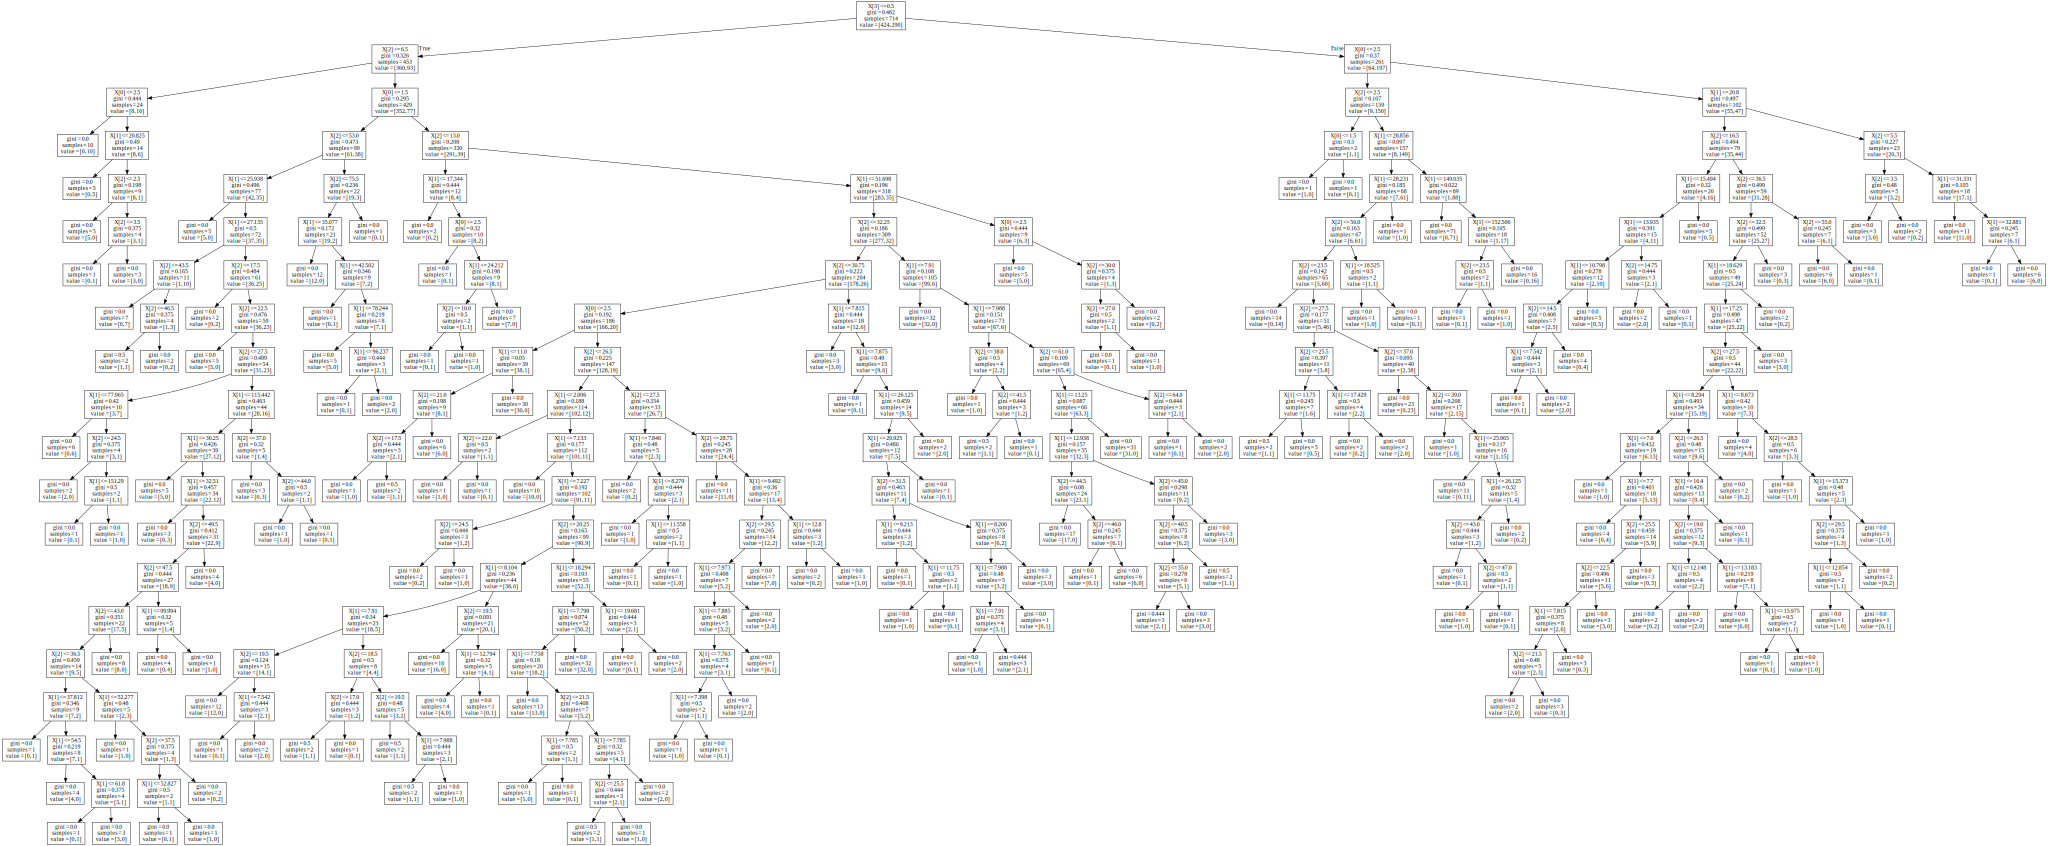

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = gr.Source(dot_data) 
graph